In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
import glob

from matplotlib.ticker import MaxNLocator
import matplotlib

generate_plots = False

In [2]:
df_temp = pd.read_csv("truncnorm_cost.csv")
df_temp["EML"] = df_temp["EML"].apply(pd.to_numeric, errors = 'coerce')
df_temp["Cost"] = df_temp["Cost"].apply(pd.to_numeric, errors = 'coerce')
df_temp["Trainset"] = df_temp["Trainset"].apply(pd.to_numeric, errors = 'coerce')
df_temp.head()

,Unnamed: 0,Function,Fit,Parameters,Cost,Trainset,EML
0,0.0,Optimal,NaN,NaN,11.937459,10.0,0.000000
1,1.0,Discrete,NaN,NaN,14.492784,10.0,0.214059
2,2.0,Continuous,dgamma,0.8201252498598662 7.803479298796732 1.0794527...,12.590859,10.0,0.054735
3,3.0,Optimal,NaN,NaN,11.937459,60.0,0.000000
4,4.0,Discrete,NaN,NaN,12.858971,60.0,0.077195


In [3]:
df_optimal = df_temp[df_temp.Function=="Optimal"]
df_discrete = df_temp[df_temp.Function=="Discrete"]
df_funct = df_temp[(df_temp.Function=="Continuous") & (df_temp.Parameters!="pearson3") & (df_temp.EML!=np.inf)]

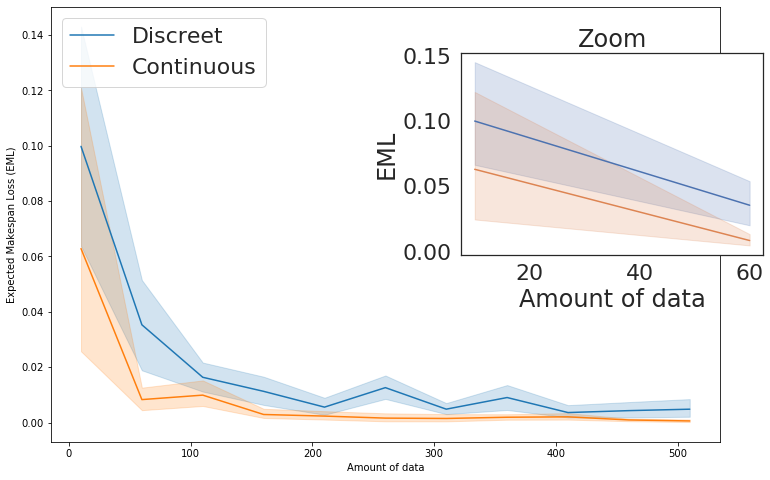

In [4]:
# plot the cost for different polynomial orders
fig, ax = plt.subplots(figsize=(12,8))
sns.set(font_scale=2)
sns.set_style("white")

sns.lineplot(x="Trainset", y="EML", data=df_discrete, label="Discrete", ax=ax)
sns.lineplot(x="Trainset", y="EML", data=df_funct, label="Continuous", ax=ax)
ax.set_xlabel('Amount of data')
ax.set_ylabel('Expected Makespan Loss (EML)')
plt.legend(loc='upper left')

ax2 = plt.axes([0.6, 0.45, .35, .35], facecolor='w')
sns.lineplot(x="Trainset", y="EML", data=df_discrete[df_discrete.Trainset<100], ax=ax2)
sns.lineplot(x="Trainset", y="EML", data=df_funct[df_funct.Trainset<100], ax=ax2)
ax2.set_xlabel('Amount of data')
ax2.set_ylabel('EML')
ax2.set_title('Zoom')

if generate_plots:
    plt.savefig("truncnorm.png")